In [1]:
import pandas as pd

In [14]:
url = './mail.csv'
dtype={'To':'string', 'Subject':'string', 'X-From':'string',
       'X-To':'string', 'X-cc':'string', 'X-bcc':'string', 'X-Folder':'string', 'X-Origin':'string', 'X-FileName':'string',
       'content':'string', 'user':'string', 'Cat_1_level_1':'string', 'Cat_1_level_2':'string', 'Cat_1_weight':'string',
       'Cat_2_level_1':'string', 'Cat_2_level_2':'string', 'Cat_2_weight':'string', 'Cat_3_level_1':'string',
       'Cat_3_level_2':'string', 'Cat_3_weight':'string', 'Cat_4_level_1':'string', 'Cat_4_level_2':'string',
       'Cat_4_weight':'string', 'Cat_5_level_1':'string', 'Cat_5_level_2':'string', 'Cat_5_weight':'string',
       'Cat_6_level_1':'string', 'Cat_6_level_2':'string', 'Cat_6_weight':'string', 'Cat_7_level_1':'string',
       'Cat_7_level_2':'string', 'Cat_7_weight':'string', 'Cat_8_level_1':'string', 'Cat_8_level_2':'string',
       'Cat_8_weight':'string', 'Cat_9_level_1':'string', 'Cat_9_level_2':'string', 'Cat_9_weight':'string',
       'Cat_10_level_1':'string', 'Cat_10_level_2':'string', 'Cat_10_weight':'string', 'Cat_11_level_1':'string',
       'Cat_11_level_2':'string', 'Cat_11_weight':'string', 'Cat_12_level_1':'string', 'Cat_12_level_2':'string',
       'Cat_12_weight':'string'}
data = pd.read_csv(url,dtype=dtype)

In [36]:
data['content']

0                                     Here is our forecast
1        Traveling to have a business meeting takes the...
2                            test successful. way to go!!!
3        Randy, Can you send me a schedule of the salar...
4                        Let's shoot for Tuesday at 11:45.
                               ...                        
99995    ---------------------- Forwarded by Daren J Fa...
99996    What occurred at this point in prior months? W...
99997    Aimee, PG&E's numbers are correct. Aimee Lanno...
99998    ---------------------- Forwarded by Daren J Fa...
99999    Vintage should be 93730. Julie Meyers 12/20/99...
Name: content, Length: 100000, dtype: string

In [45]:
data['content_len'] = data['content'].apply(lambda x: len(x) if (type(x)==type('str')) else 0)

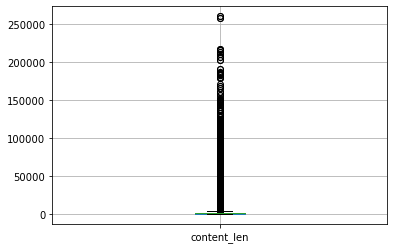

In [61]:
data.boxplot(column=['content_len'])

In [64]:
data['content_len'].describe()

count    100000.00000
mean       2158.93104
std        7370.24427
min           0.00000
25%         272.00000
50%         758.00000
75%        1854.00000
max      260461.00000
Name: content_len, dtype: float64

In [81]:
data['content_len'].quantile(0.90)

content_length_q1 = data['content_len'].quantile(0.25)
content_length_q2 = data['content_len'].quantile(0.75)


In [88]:
data['content_length_category'] = data['content_len'].apply(lambda x: 'short message' if x<content_length_q1 else ('average message' if x<content_length_q2 else 'long message'))

In [89]:
data['content_length_category']

0          short message
1        average message
2          short message
3          short message
4          short message
              ...       
99995    average message
99996    average message
99997    average message
99998       long message
99999    average message
Name: content_length_category, Length: 100000, dtype: object